In [ ]:
!pip install -U plotly

# Violencia en México




__<h1>Equipo 9</h1>__
<h2>Integrantes:</h2>
<ul>
  <li>Santiago Ramírez Iturbe</li>
  <li>Fernando Valdez Espinosa</li>
  <li>Juan Manuel Castro Ascencio</li>
  <li>Jaime Rodrigo González Rodríguez</li>
  <li>Eduardo Marcelino López Santamaría</li>
</ul>

# **Identificación del problema:** 

Una de las principales preocupaciones de la ciudadanía es **la violencia** que azota nuestro país. De hecho, podríamos clasificarla como una pandemia silenciosa que hemos normalizado y convivimos con ella a diario de muy variadas formas.

La OMS define **la violencia** como *el uso intencional de la fuerza o el poder 
físico contra uno mismo, otra persona o un grupo o una comunidad; que cause o tenga muchas probabilidades de causar lesiones, muerte o daños psicológicos*.

Consideramos que un primer acercamiento desde el punto de vista estadístico permite clarificar el problema, clasificando los delitos podemos segmentar y analizar si **la violencia** del país es la misma en todos los estados o si ciertos delitos se dan con mayor frecuencia en ciertas regiones del país. Entendemos que en México hasta la denuncia es un privilegio, y que los sectores más desprotegidos no siempre tienen al alcance un abogado o la asesoría adecuada para poder exigir a la autoridad la impartición de justicia o el resarcimiento del daño.

En este grupo de trabajo confiamos en que un análisis preciso y científico de los datos, contribuirá en aportar elementos que ayuden a clarificar las incidencias de los tipos de delitos y con ello se pueda conocer más del origen del problema y a su vez, su posible solución. 


# **Planteamiento de preguntas:**

Con el repositorio de datos, pretendemos contestar las siguientes preguntas.

- ¿Cómo se comporta la incidencia delictiva de 2015 a 2021?

- ¿Cuál es el comportamiento por tipo de delito en cada estado?

- ¿En qué estados existen más homicidios?

- ¿Qué estados son los más violentos?

- ¿Cuál es el tipo de delito más común?

- ¿Cuál es el comportamiento de los delitos de orden sexual en nuestro país?


### **Métrica de evaluación BEDU**
1.	Identificación del problema:  identificar y escoger un problema (justificar su elección). Presentar investigación preliminar completa del tema. Presentar información previa sobre las soluciones al problema.

2.	Planteamiento de preguntas:  Las son correctamente respondidas. La entrega tiene al menos 5 preguntas pertinentes sobre el problema.

3.	Colección de datos:  Obtener una colección de datos completa y no previamente procesada que usará para los siguientes pasos.
 Los datos recopilados pueden responder completamente las preguntas planteadas anteriormente.

4.	Análisis exploratorio de los datos:  Convertir de forma adecuada su colección de Datos (en JSON, CSV, etc…) en un DataFrame de Pandas. Realizar un análisis exploratorio de estos datos a través del uso correcto de Pandas.

5.	Limpieza de datos:  El nuevo Dataset no contiene ningún NaN.
 El Dataset está correctamente indexado (en orden y sin índices incoherentes).Las columnas están correctamente nombradas.
 Se aplicaron agregaciones al Dataset para poder comenzar a responder algunas preguntas planteadas en la sesión 2.

6.	Transformación de datos: Todos los datos de cada columna tienen un valor correcto dependiendo del tipo de dato (fechas, objetos, ints, floats).Todas las columnas de texto están manipuladas para estar en el formato correcto.
Hay nuevas columnas con nuevos datos resultantes del procesamiento de una o más columnas originales.
Se crearon otros datasets/subconjuntos/series que presentan información relevante para una pregunta específica, o simplemente para exploraciones más profundas.

7.	Ordenamiento de código: Entregar un Jupyter Notebook ordenado y limpio que contiene todos los pasos llevados a cabo para el preprocesamiento de datos.El Notebook hace uso de las diversas técnicas aprendidas a través de las clases para la exploración y procesamiento de datos.El Notebook contiene el código (nombrado correctamente) de todas las sesiones pasadas.

8.	Opcional uso de APIs

# **Transformación y limpieza de los datos**

 <h2>Colección de datos</h2>

Los datos con los que trabajaremos fueron publicados por el [**Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP)**](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published) los cuales fueron actualizados el 20 de Julio del 2021 y se pueden descargar directamente en el siguiente [enlace](https://drive.google.com/file/d/1kDqNrJq3BvZCIVIOhB6z8mciapRuWflT/view).

In [ ]:
import pandas as pd
import numpy as np

Vamos a leer el archivo desde la página oficial con el siguiente código

In [ ]:
URL = 'https://drive.google.com/file/d/1kDqNrJq3BvZCIVIOhB6z8mciapRuWflT/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df_nacional = pd.read_csv(path, encoding='latin-1')
df_nacional.head(3)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0


Realizamos una exploración inicial para conocer los datos con los que estamos trabajando. Nos interesa conocer las columnas de nuestro dataframe así como el tipo de dato que maneja cada una ellas, esto con el fin de determinar si es necesario un pre-procesamiento



In [ ]:
df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21952 entries, 0 to 21951
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     21952 non-null  int64  
 1   Clave_Ent               21952 non-null  int64  
 2   Entidad                 21952 non-null  object 
 3   Bien jurídico afectado  21952 non-null  object 
 4   Tipo de delito          21952 non-null  object 
 5   Subtipo de delito       21952 non-null  object 
 6   Modalidad               21952 non-null  object 
 7   Enero                   21952 non-null  object 
 8   Febrero                 21952 non-null  object 
 9   Marzo                   21952 non-null  object 
 10  Abril                   21952 non-null  object 
 11  Mayo                    21952 non-null  object 
 12  Junio                   21952 non-null  object 
 13  Julio                   18816 non-null  object 
 14  Agosto                  18816 non-null

En este primer análisis podemos observar el tamaño de nuestros datos, el cual cuenta con un total de __19__ columnas y __21,952__ entradas o filas. Igual observamos que las últimas 12 columnas corresponden a los meses y que en ellas existe una discrepancia ya que los meses de Enero a Octubre son de tipo _object_ y los meses de Noviembre y Diciembre de tipo _float64_, esto es algo que tendrá que ser corregido posteriormente.

Ahora vamos a verificar que no tengamos valores __NaN__

In [ ]:
df_nacional.isna().sum()

Año                          0
Clave_Ent                    0
Entidad                      0
Bien jurídico afectado       0
Tipo de delito               0
Subtipo de delito            0
Modalidad                    0
Enero                        0
Febrero                      0
Marzo                        0
Abril                        0
Mayo                         0
Junio                        0
Julio                     3136
Agosto                    3136
Septiembre                3136
Octubre                   3136
Noviembre                 3136
Diciembre                 3136
dtype: int64

Las columnas de Agosto hasta Diciembre tienen datos __NaN__ que deberemos eliminar para no tener problemas con el análisis posterior. 

Antes vamos a observar nuestro DataFrame 

In [ ]:
df_nacional.head(3)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0


En este DataFrame no podemos eliminar los valores __NaN__ por columnas _(axis = 1)_ ya que nos eliminaría todas las entradas correspondientes a esos meses, sin embargo, tampoco se puede eliminar por fila _(axis = 0)_ ya que de igual forma eliminaríamos datos importantes de los meses de Enero a Junio.

La forma del DataFrame nos impide realizar las transformaciones que necesitamos, por lo que primero vamos a transformar el DataFrame. En este caso nos conviene hacer que los meses sean filas en lugar de columnas y que los valores de cada mes sean una sola columna llamada _Numero de casos_

In [ ]:
df_nacional = df_nacional.melt(id_vars=['Año','Clave_Ent','Entidad','Bien jurídico afectado', 'Tipo de delito','Subtipo de delito','Modalidad'], 
        var_name="Mes", 
        value_name="Numero de casos")

In [ ]:
df_nacional.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Numero de casos
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,3
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,2
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0


In [ ]:
df_nacional.isna().sum()

Año                           0
Clave_Ent                     0
Entidad                       0
Bien jurídico afectado        0
Tipo de delito                0
Subtipo de delito             0
Modalidad                     0
Mes                           0
Numero de casos           18816
dtype: int64

Con el nuevo data frame sí podemos eliminar los valores __NaN__ sin perder datos importantes de otras entradas ni de otros meses. Ahora solo eliminaremos los valores de la columna _Numero de casos_ que no nos sirven.

In [ ]:
df_nacional = df_nacional.dropna(axis= 0, how='any')

df_nacional.isna().sum()

Año                       0
Clave_Ent                 0
Entidad                   0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Mes                       0
Numero de casos           0
dtype: int64

Ya que no tenemos valores no numéricos revisemos nuevamente los distintos tipos de datos que tenemos en nuestro dataframe

In [ ]:
df_nacional.dtypes

Año                        int64
Clave_Ent                  int64
Entidad                   object
Bien jurídico afectado    object
Tipo de delito            object
Subtipo de delito         object
Modalidad                 object
Mes                       object
Numero de casos           object
dtype: object

Nos conviene realizar los siguiente cambios:

1. Cambiar el tipo de la columna __Clave_Ent__ a tipo _object_ o _str_
2. Cambiar el tipo de la columna __Numero de casos__ a tipo _int_
3. Unir las columnas __Año__ y __Mes__ en una columna __Fecha__ y convertir a tipo _datetime_. Para esto primero hay que convertir la columna __Año__ a tipo _object_ para poder concatenar ambas columnas.



In [ ]:
df_nacional[['Año','Clave_Ent']] = df_nacional[['Año','Clave_Ent']].astype('str')

df_nacional['Numero de casos'] = df_nacional['Numero de casos'].replace(',', '', regex= True).astype('int')


Antes de unir las columnas de __Año__ y __Mes__ vamos a realizar un cambio en esta última, lo que haremos será cambiar el nombre de cada mes por su número correspondiente, por ejemplo: __Enero -> 1, Febrero -> 2__. 

Esto nos evitará problemas al momento de cambiar el tipo de la columna resultante __Fecha__ a _datetime_.

In [ ]:
df_nacional['Mes'] = df_nacional['Mes'].replace({'Enero':'1', 'Febrero':'2', 'Marzo':'3', 'Abril':'4','Mayo':'5', 'Junio':'6',
                            'Julio':'7', 'Agosto':'8', 'Septiembre':'9', 'Octubre':'10', 'Noviembre':'11','Diciembre':'12'})

df_nacional['Fecha'] = df_nacional['Año'] + '/' + df_nacional['Mes']

df_nacional['Fecha'] = pd.to_datetime(df_nacional['Fecha'], format='%Y/%m')

df_nacional = df_nacional.drop(columns=(['Año', 'Mes']))

df_nacional.head(3)

,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Numero de casos,Fecha
0,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,2015-01-01
1,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,2015-01-01
2,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,2015-01-01


Por cuestiones de orden, podemos hacer que la columna de __Fecha__ se encuentre al principio del DataFrame

In [ ]:
cols = df_nacional.columns.to_list()
cols = cols[-1:] + cols[:-1]

df_nacional = df_nacional[cols]

df_nacional.head(3)

,Fecha,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Numero de casos
0,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3
1,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1
2,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0


In [ ]:
df_nacional.dtypes

Fecha                     datetime64[ns]
Clave_Ent                         object
Entidad                           object
Bien jurídico afectado            object
Tipo de delito                    object
Subtipo de delito                 object
Modalidad                         object
Numero de casos                    int64
dtype: object

Ahora ya tenemos nuestros datos limpios y con los tipos de datos adecuados para cada columna. 

# **Análisis exploratorio de los datos**

En esta sección vamos a tratar de responder las preguntas que nos planteamos al inicio del proyecto

## Incidencia delictiva a través del tiempo

In [ ]:
import matplotlib.pyplot as plt

Primero vamos a analizar el comportamiento temporal de todos los casos de violencia registrados. Para facilitar este análisis haremos que la __Fecha__ sea el índice de nuestro DataFrame.

In [ ]:
df_nacional_temporal = df_nacional.set_index(df_nacional['Fecha']).drop(columns=(['Fecha']))
df_nacional_temporal.head(3)

,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Numero de casos
Fecha,,,,,,,
2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3
2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1
2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0


Este cambio de índice nos sirve para hacer gráficas temporales o series de tiempo. 

Por ejemplo, para saber que mes se registró el mayor número de casos podemos utilizar el siguiente código

In [ ]:
df_nacional_temporal.resample('M').sum().sort_values('Numero de casos',ascending=False).head(3)

,Numero de casos
Fecha,
2019-05-31,185802
2021-03-31,183145
2019-10-31,182051


Esto indica que en Mayo del 2019 se registró el mayor número de delitos con 185802 casos. 

Ahora vamos a observar este comportamiento gráficamente. Lo que queremos conocer es si existe algun comportamiento repetitivo a través de los años.

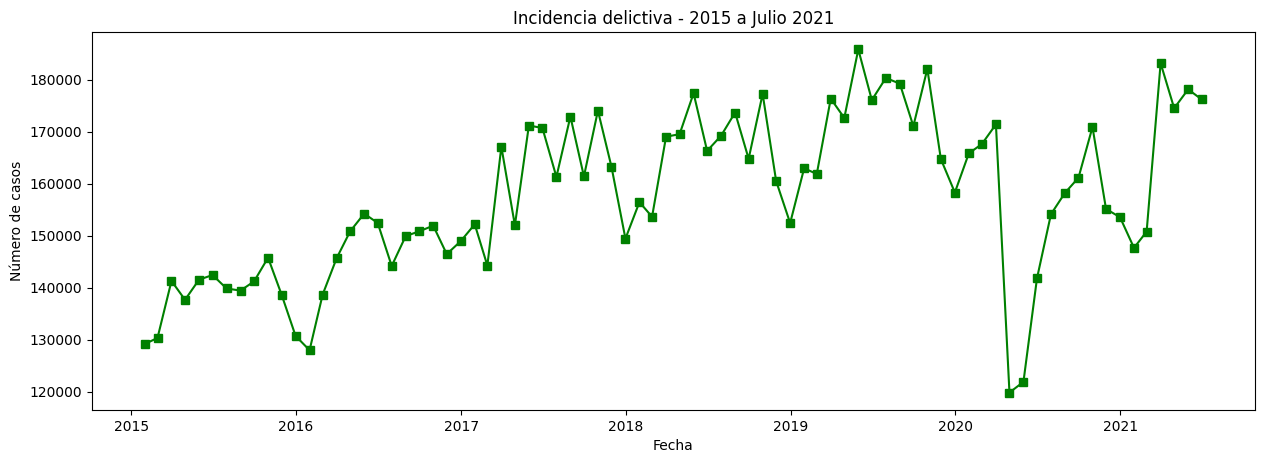

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
ax.plot(df_nacional_temporal.resample('M')['Numero de casos'].sum(), marker = 's', color='g')
ax.set(title='Incidencia delictiva - 2015 a Julio 2021', xlabel='Fecha', ylabel='Número de casos')
 
plt.show()

Primeramente podemos decir que el número de casos desde el 2015 al 2019 cada vez fue en aumento. Podemos observar una caida en los primero meses del 2020 la cual podemos asumir fue debido a la __Pandemia__ y cuarentena que comenzó alrededor de Marzo de ese año. Sin embargo, el número de casos siguió en aumento rápidamente.

Otro punto interesante, es que sí existe un comportamiento _periódico_, se puede ver que a inicio y finales de año se reporta una caída de delitos a nivel nacional y que aumenta durante el transcurso del año. 

De igual forma resulta interesante conocer cuales son los __Tipos de delito__ con mayor incidencia en el país. Con el siguiente código podemos saber las diferentes entradas que tiene la columna __Tipo de delito__

In [ ]:
df_nacional['Tipo de delito'].unique()

array(['Homicidio', 'Lesiones', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo', 'Fraude', 'Abuso de confianza', 'Extorsión',
       'Daño a la propiedad', 'Despojo',
       'Otros delitos contra el patrimonio', 'Violencia familiar',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Otros delitos contra la familia', 'Corrupción de menores',
       'Trata de personas', 'Otros delitos contra la sociedad',
       'Narcomenudeo', 'Amenazas', 'Allanamiento de morada',
       'Evasión de presos', 'Falsedad'

Ahora podemos realizar una agrupación y saber cuáles son los 10 tipos de delitos con mayor incidencia en todo el país.

In [ ]:
df_nacional.groupby('Tipo de delito').sum()['Numero de casos'].sort_values(ascending=False).head(10)

Tipo de delito
Robo                             4619016
Lesiones                         1301121
Violencia familiar               1190321
Otros delitos del Fuero Común    1147395
Daño a la propiedad               825761
Amenazas                          591472
Fraude                            443432
Narcomenudeo                      355601
Homicidio                         262843
Despojo                           167507
Name: Numero de casos, dtype: int64

Podemos observar que el tipo de delito con más casos registrados es el __Robo__, seguido por __Lesiones__ y __Violencia familiar__.

Tambien tenemos __Homicidio__ en el número 9, este es un tipo de delito de mayor interés para analizar posteriormente.
 

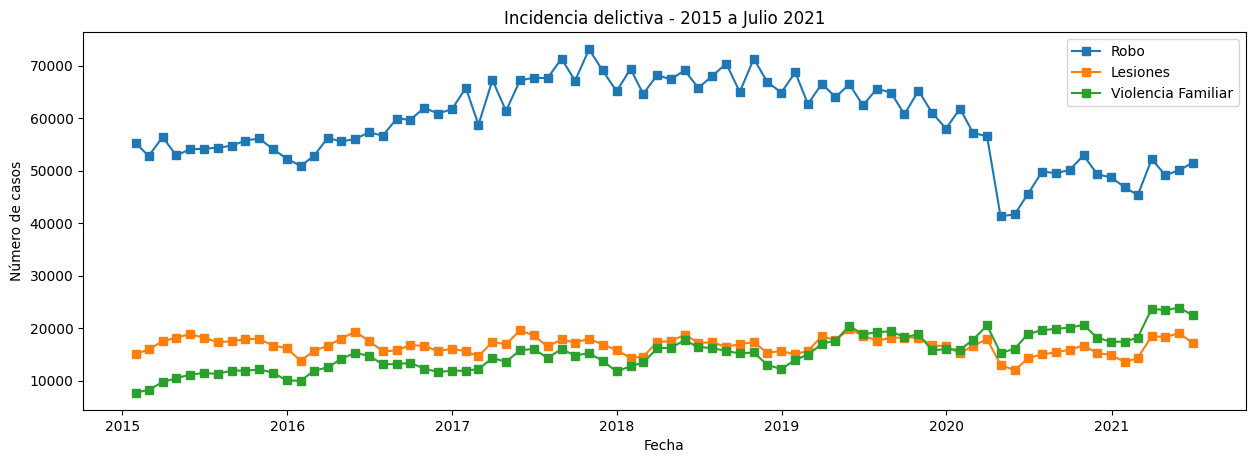

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
ax.plot(df_nacional_temporal[df_nacional_temporal['Tipo de delito']=='Robo'].resample('M').sum(),marker = 's' ,label='Robo')
ax.plot(df_nacional_temporal[df_nacional_temporal['Tipo de delito']=='Lesiones'].resample('M').sum(),marker = 's', label = 'Lesiones')
ax.plot(df_nacional_temporal[df_nacional_temporal['Tipo de delito']=='Violencia familiar'].resample('M').sum(),marker = 's', label = 'Violencia Familiar')
ax.set(title='Incidencia delictiva - 2015 a Julio 2021', xlabel='Fecha', ylabel='Número de casos')
ax.legend()
plt.show()

Podemos ver el mismo comportamiento en los primeros meses del 2020, con un decaimiento de incidentes debido a la pandemia. 

Resulta importante notar que los casos de __Violencia Familiar__ despues del 2020 están en aumento, de nuevo se puede adjudicar a la cuarentena, donde las familias tienen que pasar más tiempo juntos.

### Homicidios

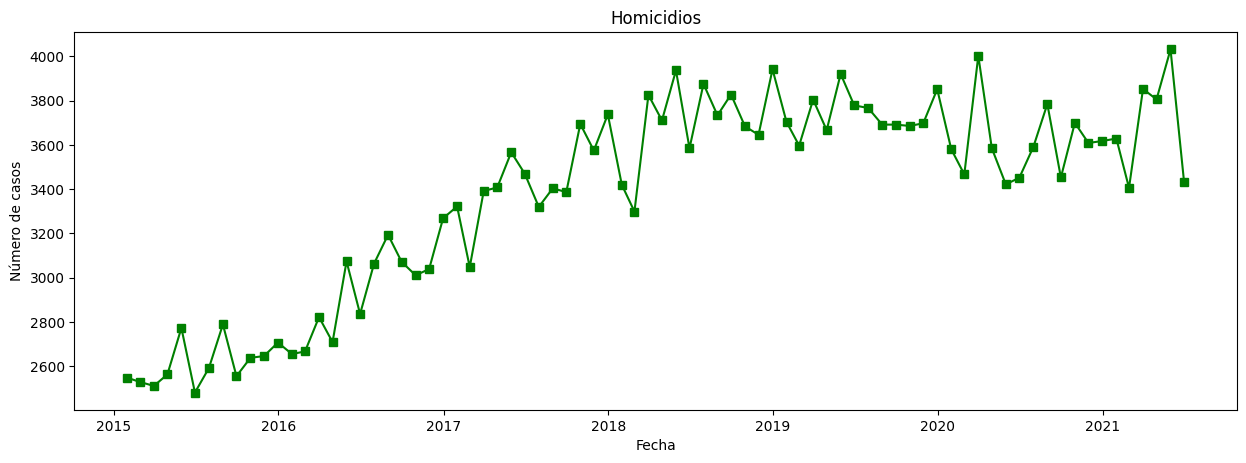

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
ax.plot(df_nacional_temporal[df_nacional_temporal['Tipo de delito']=='Homicidio'].resample('M').sum(),marker = 's', color = 'g')

ax.set(title='Homicidios', xlabel='Fecha', ylabel='Número de casos')
plt.show()

In [ ]:
df_nacional_temporal[df_nacional_temporal['Tipo de delito']=='Homicidio'].resample('M').sum().sort_values('Numero de casos', ascending=False).head(3)

,Numero de casos
Fecha,
2021-05-31,4032
2020-03-31,4003
2018-12-31,3942


Curiosamente el mes con mas __Homicidios__ a nivel Nacional se dió recientemente en Junio del 2021. Posteriormente se analizará en que estados ocurrió un mayor número de casos

## Incidencia delictiva geográficamente

Para realizar un _analisis_ geográfico utilizaremos la columna de __Entidad__ . 

Para comenzar podemos saber en que estados se registraron más casos de violencia.

In [ ]:
df_nacional.groupby('Entidad').sum().sort_values('Numero de casos',ascending = False).head(10)

,Numero de casos
Entidad,
México,2221918
Ciudad de México,1345103
Jalisco,908103
Guanajuato,780114
Baja California,687391
Nuevo León,521810
Chihuahua,431966
Veracruz de Ignacio de la Llave,429933
Puebla,407461


El estado de México es el lugar con mayor número de casos registrados (incidencia), seguido por la Ciudad de México y Jalisco. Para un análisis más completo se puede trabajar con la __tasa de incidencia__ por número de habitantes, esto nos daría valores más claros.

En la siguiente gráfica de barras se muestran los estados con su respectivo el número de casos ordenados de mayor a menor.

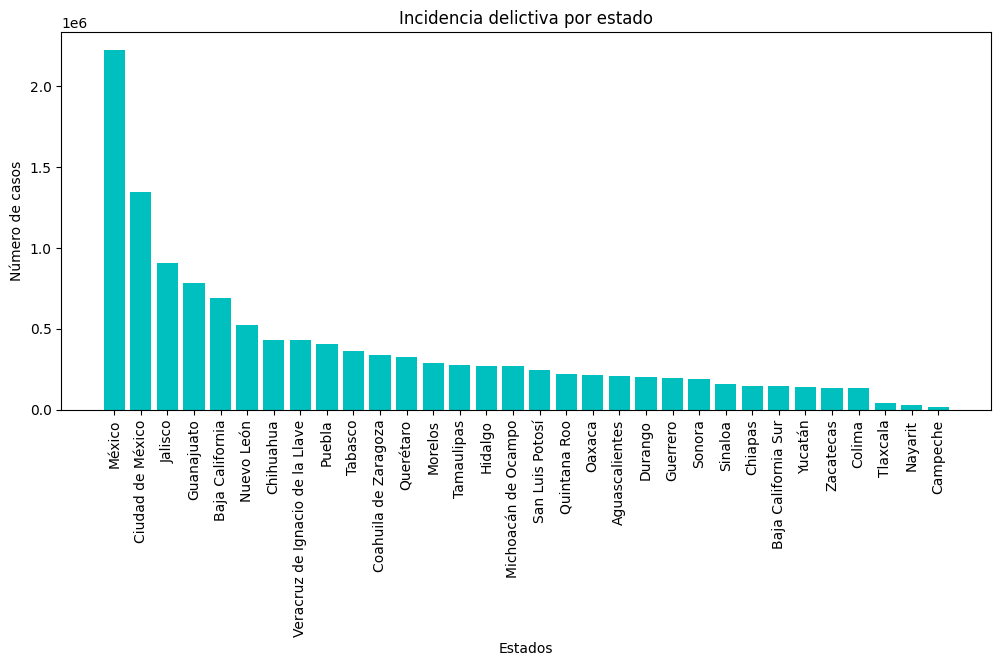

In [ ]:
x_vals = df_nacional.groupby('Entidad').sum()['Numero de casos'].sort_values(ascending = False).index
y_vals = df_nacional.groupby('Entidad').sum()['Numero de casos'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(12,5), dpi=100)

ax.bar(x_vals, y_vals,color = 'c')          
ax.set(title='Incidencia delictiva por estado', xlabel= 'Estados' , ylabel='Número de casos')
plt.xticks(rotation=90)

plt.show()

In [ ]:
import plotly.express as px
import requests

##Llamado a API
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' 
mx_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df_nacional, 
                    geojson=mx_regions_geo,
                    locations=y_vals.index, ##Valores
                    featureidkey='properties.name',  ##Ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color=y_vals, #El mapa de color es en base al número de casos
                    color_continuous_scale="burg", ##Mapa de color
                    title="Incidencia delictiva por estado", 
                    labels={
                     "color": "Casos"
                    }
                   )

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.show()


No está de más ver el comportamiento de los delitos con mayor incidencia, los cuales son __Robo__, __Lesiones__ y __Violencia familiar__. Lesiones no resulta de mucho interés por lo que solo mostraremos Robos y Violencia familiar. 

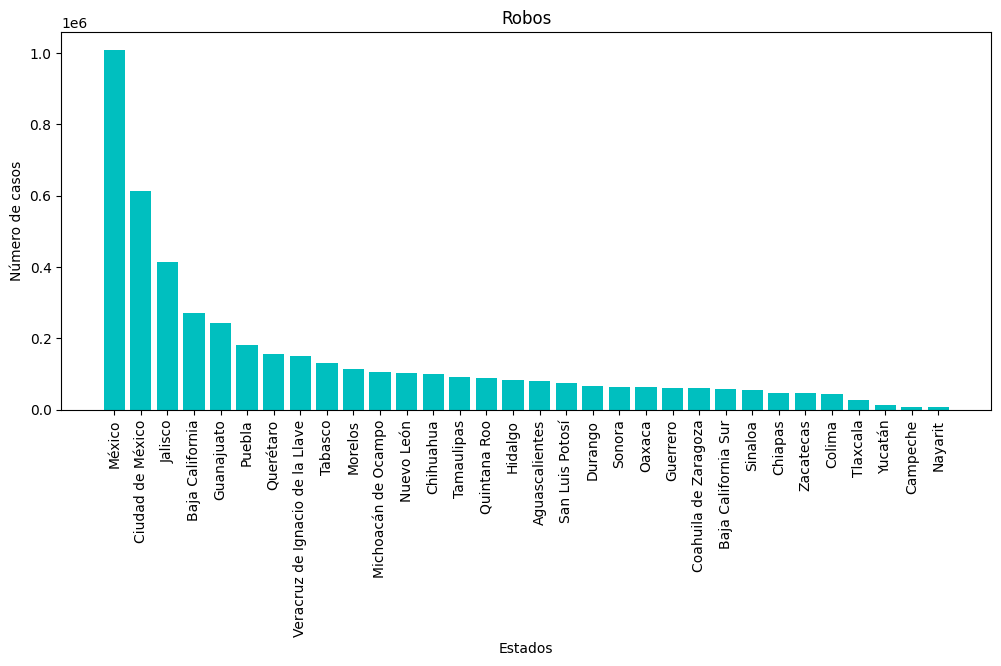

In [ ]:
x_vals = df_nacional[df_nacional['Tipo de delito']=='Robo'].groupby('Entidad').sum()['Numero de casos'].sort_values(ascending = False).index
y_vals = df_nacional[df_nacional['Tipo de delito']=='Robo'].groupby('Entidad').sum()['Numero de casos'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(12,5), dpi=100)

ax.bar(x_vals, y_vals,color = 'c')          
ax.set(title='Robos', xlabel= 'Estados' , ylabel='Número de casos')
plt.xticks(rotation=90)

plt.show()

In [ ]:
##Llamado a API
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' 
mx_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df_nacional, 
                    geojson=mx_regions_geo,
                    locations=y_vals.index, ##Valores
                    featureidkey='properties.name',  ##Ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color=y_vals, #El mapa de color es en base al número de casos
                    color_continuous_scale="burg", ##Mapa de color
                    title="Robos", 
                    labels={
                     "color": "Casos"
                    }
                   )

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.show()


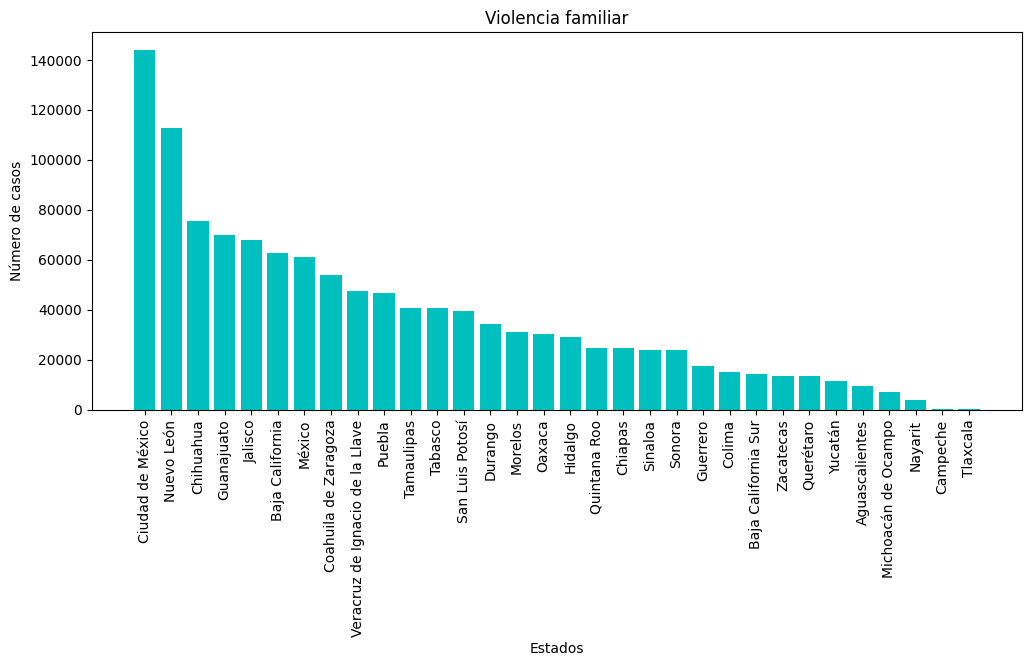

In [ ]:
x_vals = df_nacional[df_nacional['Tipo de delito']=='Violencia familiar'].groupby('Entidad').sum()['Numero de casos'].sort_values(ascending = False).index
y_vals = df_nacional[df_nacional['Tipo de delito']=='Violencia familiar'].groupby('Entidad').sum()['Numero de casos'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(12,5), dpi=100)

ax.bar(x_vals, y_vals,color = 'c')          
ax.set(title='Violencia familiar', xlabel= 'Estados' , ylabel='Número de casos')
plt.xticks(rotation=90)

plt.show()

In [ ]:
##Llamado a API
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' 
mx_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df_nacional, 
                    geojson=mx_regions_geo,
                    locations=y_vals.index, ##Valores
                    featureidkey='properties.name',  ##Ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color=y_vals, #El mapa de color es en base al número de casos
                    color_continuous_scale="burg", ##Mapa de color
                    title="Violencia familiar", 
                    labels={
                     "color": "Casos"
                    }
                   )

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.show()

Podemos ver que en el top 5 se encuentran prácticamente los mismos estados: __México, Ciudad de México, Jalisco, Baja California y Guanajuato__. 

Solo en el caso de __Violencia Familiar__ vemos que se cuela __Nuevo León__ en el segundo lugar y __Chihuahua__ en el tercero, seguidos por __Guanajuato, Jalisco, Baja California y México__

### Homicidos por Estado y Modalidad

El caso de los homicidios puede ser analizado con mayor detalle. Primero crearemos un nuevo DataFrame que contenga solamente los __homicidios__ registrados del 2015 a Julio del 2020

In [ ]:
df_homicidios = df_nacional[df_nacional['Tipo de delito']=='Homicidio']
df_homicidios.head(3)

,Fecha,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Numero de casos
0,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3
1,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1
2,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0


Además vamos a seleccionar específicamente los casos sucedidos en el 2020

In [ ]:
df_homicidios_2020 = df_homicidios[(df_homicidios['Fecha']>='2020') & (df_homicidios['Fecha']<'2021')]
df_homicidios_2020.head(3)

,Fecha,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Numero de casos
15680,2020-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3
15681,2020-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0
15682,2020-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1


Una de las cosas que queremos conocer es la cantidad de casos que se registraron según la modalidad del delito. Principalmente para conocer la distribución de armas en el país.

In [ ]:
df_homicidios_2020['Modalidad'].unique()

array(['Con arma de fuego', 'Con arma blanca', 'Con otro elemento',
       'No especificado', 'En accidente de tránsito'], dtype=object)

Vamos a crear un DataFrame auxiliar para dividir los casos totales y agruparlos por __Entidad__ y __Modalidad__ del Homicidio.

In [ ]:
df_plot_h = df_homicidios_2020.groupby(['Entidad', 'Modalidad']).sum().reset_index().pivot(columns='Modalidad', index='Entidad')
df_plot_h.columns = df_plot_h.columns.get_level_values(1)

df_plot_h['Numero de casos'] = df_plot_h.sum(axis=1)
df_plot_h = df_plot_h.sort_values('Numero de casos')
df_plot_h.head()

Modalidad,Con arma blanca,Con arma de fuego,Con otro elemento,En accidente de tránsito,No especificado,Numero de casos
Entidad,,,,,,
Baja California Sur,5,27,9,54,23,118
Campeche,22,38,21,41,0,122
Tlaxcala,22,58,38,32,0,150
Yucatán,21,8,23,101,0,153
Aguascalientes,10,44,17,149,1,221


Ahora lo visualizaremos gráficamente para enterder mejor estos agrupamientos.

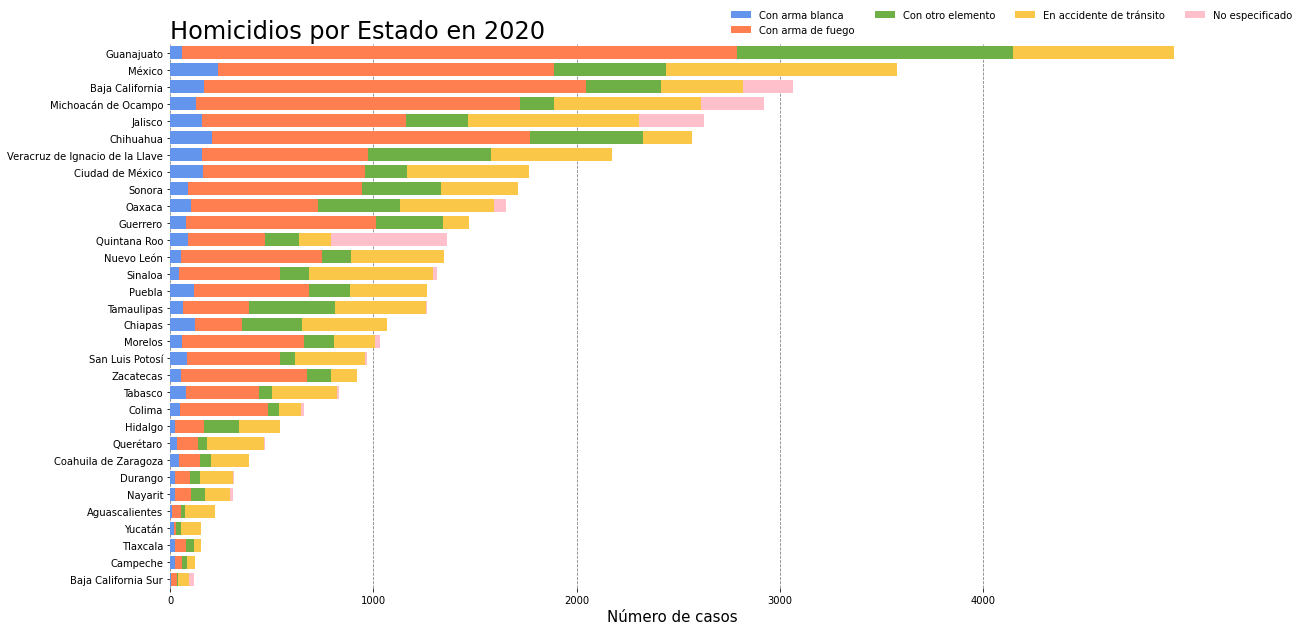

In [ ]:
fields = df_plot_h.columns[0:-1]
colors = ['cornflowerblue', 'coral', '#6EAF46', '#FAC748', 'pink' ]
labels = df_plot_h.columns[0:-1]

# figure and axis
fig, ax = plt.subplots(1, figsize=(18, 10))

# plot bars
left = len(df_plot_h) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_plot_h.index, df_plot_h[name], left = left, color=colors[idx])
    left = left + df_plot_h[name]

# title, legend, labels
plt.title('Homicidios por Estado en 2020', loc='left', fontsize = 24)
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Número de casos', fontsize = 15)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

En esta gráfica podemos observar los casos de Homicidio registrados en el 2020 divididos por la modalidad. Podemos ver que la mayoría de casos registrados fueron realizados con __armas de fuego__ seguido en su mayoría por __accidentes de tránsito__.

## Delitos de índole sexual

Otro de los temas de mayor relevancia en la actualidad es la violencia de tipo sexual como son __Acoso__ y __Violaciones__.

Vamos a buscar cuáles de las entradas en __Tipo de delito__ se pueden clasificar dentro de esta área.

In [ ]:
df_nacional['Tipo de delito'].unique()

array(['Homicidio', 'Lesiones', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo', 'Fraude', 'Abuso de confianza', 'Extorsión',
       'Daño a la propiedad', 'Despojo',
       'Otros delitos contra el patrimonio', 'Violencia familiar',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Otros delitos contra la familia', 'Corrupción de menores',
       'Trata de personas', 'Otros delitos contra la sociedad',
       'Narcomenudeo', 'Amenazas', 'Allanamiento de morada',
       'Evasión de presos', 'Falsedad'

Ahora creamos un DataFrame que contenga solamente estos tipos de delito

In [ ]:
df_abuso = df_nacional[df_nacional['Tipo de delito'].str.contains('sexual') | df_nacional['Tipo de delito'].str.contains('Violación')]
df_abuso.head()

,Fecha,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Numero de casos
32,2015-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Abuso sexual,Abuso sexual,Abuso sexual,6
33,2015-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Acoso sexual,Acoso sexual,Acoso sexual,0
34,2015-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Hostigamiento sexual,Hostigamiento sexual,Hostigamiento sexual,1
35,2015-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Violación simple,Violación simple,Violación simple,5
36,2015-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Violación equiparada,Violación equiparada,Violación equiparada,0


In [ ]:
df_abuso['Numero de casos'].sum()

288911

In [ ]:
df_abuso['Tipo de delito'].unique()

array(['Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual'],
      dtype=object)

Vamos a analizar el comportamiento a través de los años

In [ ]:
df_plot_a = df_abuso.groupby(['Fecha','Tipo de delito']).sum().reset_index().pivot(columns='Tipo de delito', index='Fecha')
df_plot_a.columns = df_plot_a.columns.get_level_values(1)

df_plot_a['Numero de casos'] = df_plot_a.sum(axis=1)
df_plot_a.head(3)

Tipo de delito,Abuso sexual,Acoso sexual,Hostigamiento sexual,Otros delitos que atentan contra la libertad y la seguridad sexual,Violación equiparada,Violación simple,Numero de casos
Fecha,,,,,,,
2015-01-01,753,95,53,493,135,798,2327
2015-02-01,791,101,74,491,169,760,2386
2015-03-01,935,103,79,502,182,898,2699


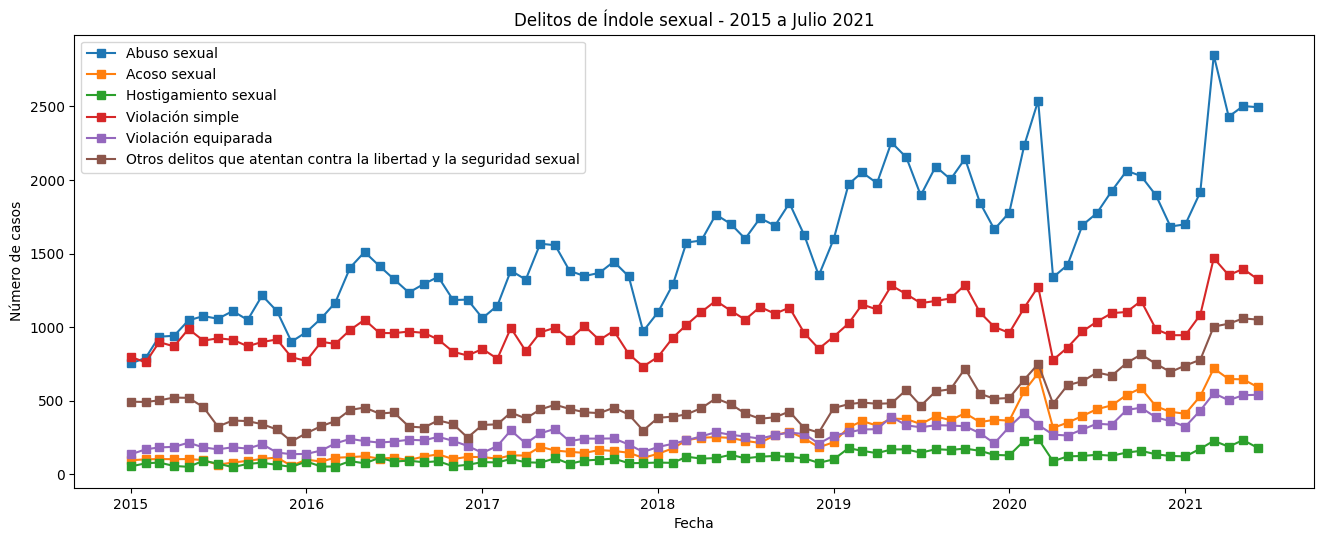

In [ ]:
fig, ax = plt.subplots(figsize=(16,6), dpi=100)

x = df_abuso['Tipo de delito'].unique()
for i in x:
  ax.plot(df_plot_a[i],marker = 's' ,label=i)

ax.set(title='Delitos de Índole sexual - 2015 a Julio 2021', xlabel='Fecha', ylabel='Número de casos')
ax.legend()
plt.show()

Tambien vamos a ver el comportamiento a nivel estatal para los casos registrados en el 2020

In [ ]:
df_abuso_2020 = df_abuso[(df_abuso['Fecha']>='2020') & (df_abuso['Fecha']<'2021')]
df_abuso_2020.head()

,Fecha,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Numero de casos
15712,2020-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Abuso sexual,Abuso sexual,Abuso sexual,0
15713,2020-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Acoso sexual,Acoso sexual,Acoso sexual,0
15714,2020-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Hostigamiento sexual,Hostigamiento sexual,Hostigamiento sexual,6
15715,2020-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Violación simple,Violación simple,Violación simple,17
15716,2020-01-01,1,Aguascalientes,La libertad y la seguridad sexual,Violación equiparada,Violación equiparada,Violación equiparada,11


In [ ]:
df_plot_a_2020 = df_abuso_2020.groupby(['Entidad', 'Tipo de delito']).sum().reset_index().pivot(columns='Tipo de delito', index='Entidad')
df_plot_a_2020.columns = df_plot_a_2020.columns.get_level_values(1)

df_plot_a_2020['Numero de casos'] = df_plot_a_2020.sum(axis=1)
df_plot_a_2020 = df_plot_a_2020.sort_values('Numero de casos')
df_plot_a_2020.head(3)

Tipo de delito,Abuso sexual,Acoso sexual,Hostigamiento sexual,Otros delitos que atentan contra la libertad y la seguridad sexual,Violación equiparada,Violación simple,Numero de casos
Entidad,,,,,,,
Tlaxcala,27,2,1,2,0,38,70
Yucatán,73,4,0,2,0,35,114
Campeche,53,2,0,20,149,53,277


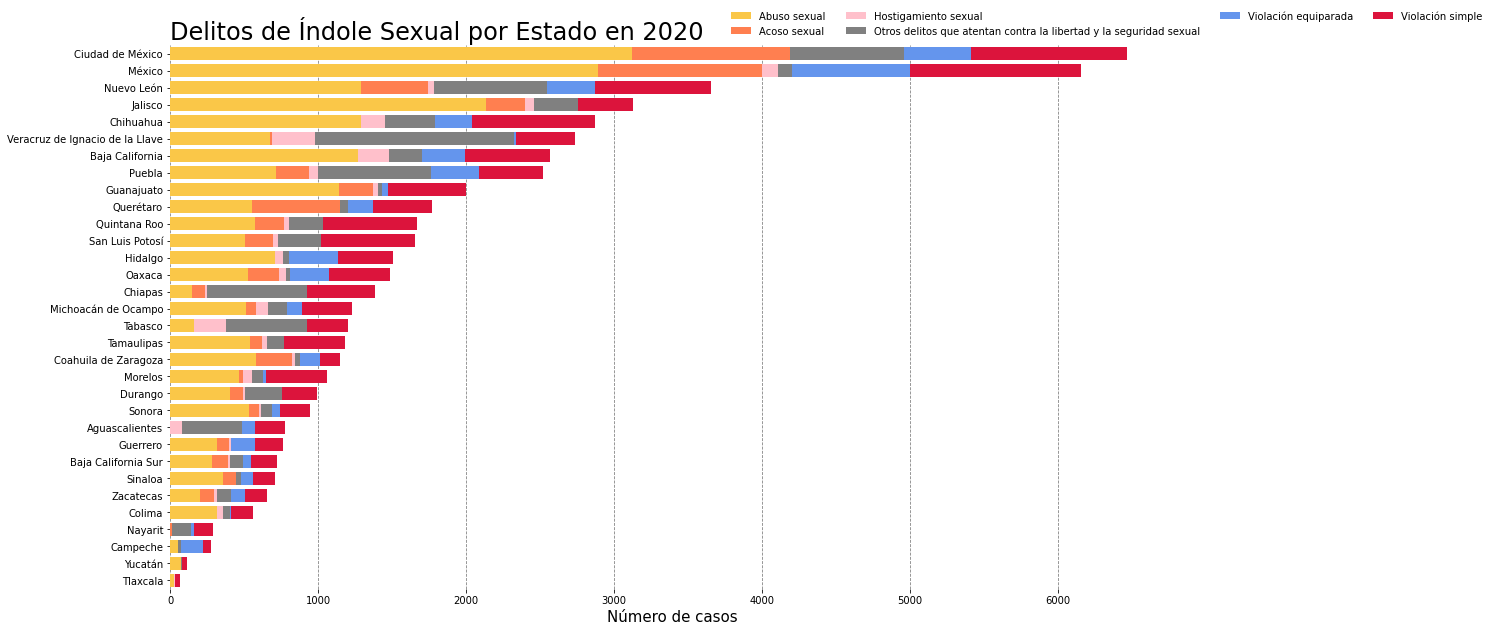

In [ ]:
fields = df_plot_a_2020.columns[0:-1]
colors = ['#FAC748', 'coral', 'pink', 'grey', 'cornflowerblue','crimson' ]
labels = df_plot_a_2020.columns[0:-1]

# figure and axis
fig, ax = plt.subplots(1, figsize=(18, 10))

# plot bars
left = len(df_plot_a_2020) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_plot_a_2020.index, df_plot_a_2020[name], left = left, color=colors[idx])
    left = left + df_plot_a_2020[name]

# title, legend, labels
plt.title('Delitos de Índole Sexual por Estado en 2020', loc='left', fontsize = 24)
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Número de casos', fontsize = 15)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

De la última gráfica, podemos concluir que es en la Ciudad de México donde se presenta la mayor cantidad de delitos de índole sexual, seguido muy de cerca por el Estado de México. Para estas dos entidades, así como prácticamente todas las demás, el delito de índole sexual que tiene mayor predominancia es el Abuso sexual. Más aún, la gráfica previa titulada **Delitos de índole sexual - 2015 a julio 2021**, muestra que este delito tiene tendencia creciente y, posiblemente derivado de la pandemia, esta tendencia se ha visto acrecentada a partir de 2020.

El resto de delitos de índole sexual también han mostrado una tendencia creciente pero ninguna ha sido tan acentuada como la presentada por Abuso sexual. De aquí se podrían desprender algunas hipótesis que darían entrada a análisis posteriores. Por ejemplo, se podría estudiar más a fondo la posible correlación entre la prescencia de la pandemia y el incremento en delitos de índole sexual, analizar si el hecho de que las familias compartan más tiempo, favorece la incidencia de este tipo de crímenes como  en el caso de __violencia familiar__.

También nos podemos fijar en los estados en donde este tipo de delitos es prácticamente nulo o con mucho menor incidencia en comparación con los ya mencionados. Se podría pensar que existen variables no contempladas que tienen algún tipo de correlación con la ocurrencia o no de este tipo de delitos. De igual forma para tener un análisis más objetivo se podría trabajar con una _tasa_ por habitantes de cada estado. 